# Slugging Percentages
## Author: Matthew Chin (2021)

**Data**
https://github.com/chadwickbureau/baseballdatabank

In [1]:
# plotly standard imports
import plotly.graph_objs as go
import chart_studio.plotly as py

# Cufflinks wrapper on plotly
import cufflinks

# Data science imports
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 999

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# from __future__ import print_function, division
import matplotlib as mpl
import matplotlib.pyplot as plt


from plotly.offline import iplot
cufflinks.go_offline()

# Set global theme
cufflinks.set_config_file(world_readable=True, theme='pearl')

## Slugging Percentage

A batter's slugging percentage involves not only how frequently but how far they get on base when they hit. When they go to bat and they get on base safely with a hit, it increases their chances at getting home. In that case, one's slugging percentage will go up if they hit a single, but goes even farther up if they get on safely with an extra base hit (XBH) or with a home run and touch all four bases. 

Extra base hits and home runs matter for the significance of one's slugging percentage because the power and speed of a batter are considered to know how many bases they touch per at-bat.  

Walks or base on balls (BB) are not considered because they are not hits. 

The formula for slugging is as follows 
(Reference: https://www.mlb.com/glossary/standard-stats/slugging-percentage#:~:text=Definition,hits%20are%20not%20valued%20equally.):

Let $1B$ be a single, $2B$ be a double, $3B$ be a triple, and $HR$ be a home run. 

The formula is:

$SLG = \frac{1B + (2\times2B) + (3\times3B )+ (4\times HR)}{AB}$

In [2]:
# Get slugging percentages from Batting data
slugpct = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv",sep=',')

In [3]:
# Get batters who are sluggers from People data
slugppl = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/People.csv",sep=',')

In [6]:
# Sample of slugpct beginning or end values
# Later cells are the most recent statistics

# slugpct.head()
slugpct.tail()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
108784,zimmebr02,2020,1,BAL,AL,2,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108785,zimmejo02,2020,1,DET,AL,3,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108786,zimmeky01,2020,1,KCA,AL,16,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108787,zuberty01,2020,1,KCA,AL,23,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108788,zuninmi01,2020,1,TBA,AL,28,75,8,11,4,0,4,10.0,0.0,0.0,6,37.0,0.0,3.0,0.0,0.0,0.0


In [4]:
# Show dataframe values
slugpct

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108784,zimmebr02,2020,1,BAL,AL,2,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108785,zimmejo02,2020,1,DET,AL,3,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108786,zimmeky01,2020,1,KCA,AL,16,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108787,zuberty01,2020,1,KCA,AL,23,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Print array values
slugarr = slugpct.to_numpy()
slugarr

array([['abercda01', 1871, 1, ..., nan, nan, 0.0],
       ['addybo01', 1871, 1, ..., nan, nan, 0.0],
       ['allisar01', 1871, 1, ..., nan, nan, 1.0],
       ...,
       ['zimmeky01', 2020, 1, ..., 0.0, 0.0, 0.0],
       ['zuberty01', 2020, 1, ..., 0.0, 0.0, 0.0],
       ['zuninmi01', 2020, 1, ..., 0.0, 0.0, 0.0]], dtype=object)

In [ ]:
# Keep these columns names
slugpct.columns

In [36]:
import csv
fcsv = "slugpctAL_2019.csv"
fcsv2 = "slugpctNL_2019.csv"
mean_ba = "mean_ba.csv"
# len(slugpct)
# len(slugarr)

<h1>Abbreviations</h1>

G       Games played<br>
AB      At-bats<br>
R       Runs<br>
H       Hits<br>
B       Singles (1 base)<br>
2B      Doubles (2 bases)<br>
3B      Triples (3 bases)<br>
HR      Home Runs (4 bases)<br>
RBI     Runs Batted In<br>
SB      Stolen Bases<br>
CS      Caught Stealing<br>
BB      Base on Balls/Walks<br>
SO      Struck Out<br>
IBB     Intentional Base on Balls/Intentional Walks<br>
HBP     Hit By Pitch<br>
SH      Sacrifice Bunt<br>
SF      Sacrifice Fly<br>
GIDP    Grounded Into Double Play<br>
BA      Batting Average<br>
SLG     Slugging Percentage<br>
OBP     On-Base Percentage<br>
OPS     On-base percentage Plus Slugging<br>


In [ ]:
# Take 2019 data
# Get data from American League (AL) in players with at least 50 ABs & 25 hits
# Write to new CSV file called 'slugpct.csv'

# # old columns:
# 'playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
#        '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
#        'SF', 'GIDP'

newrows = ['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 
            'H', 'B', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 
            'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'BA', 'SLG', 'OBP', 'OPS'
            ]

In [ ]:
# AL 2019 data
# AL slugging pct in 2019 by players with at least 50 ABs & 25 hits

with open(fcsv, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(newrows)
    for a in slugarr:
        if a[1] == 2019 and a[4] == 'AL' and a[6] >= 50 and a[8] >= 25:
            slg = ((a[8]-(a[9]+a[10]+a[11])) + (2*a[9]) + (3*a[10]) + (4*a[11]))/a[6]
            bavg = a[8]/a[6]
            obp = (a[8] + a[15] + a[18]) / (a[6] + a[15] + a[18] + a[20])
            ops = obp + slg
            csvwriter.writerow([a[0], a[1], a[2], a[3], a[4], a[5], a[6], a[7], a[8],
                (a[8]-(a[9]+a[10]+a[11])), a[9], a[10], a[11], a[12], a[13], a[14], a[15], 
                a[16], a[17], a[18], a[19], a[20], a[21], 
                bavg, slg, obp, ops])

In [ ]:
# AL 2019 data in Pandas dataframe

al_sluggers = pd.read_csv(fcsv)
al_sluggers

In [ ]:
# NL 2019 data
# NL slugging pct in 2019 by players with at least 50 ABs & 25 hits


with open(fcsv2, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(newrows)
    for a in slugarr:   
        if a[1] == 2019 and a[4] == 'NL' and a[6] >= 50 and a[8] >= 25:
            slg = ((a[8]-(a[9]+a[10]+a[11])) + (2*a[9]) + (3*a[10]) + (4*a[11]))/a[6]
            bavg = a[8]/a[6]
            obp = (a[8] + a[15] + a[18]) / (a[6] + a[15] + a[18] + a[20])
            ops = obp + slg
            csvwriter.writerow([a[0], a[1], a[2], a[3], a[4], a[5], a[6], a[7], a[8],
                (a[8]-(a[9]+a[10]+a[11])), a[9], a[10], a[11], a[12], a[13], a[14], a[15], 
                a[16], a[17], a[18], a[19], a[20], a[21], 
                bavg, slg, obp, ops])

In [14]:
# NL 2019 data in Pandas dataframe

nl_sluggers = pd.read_csv(fcsv2)
nl_sluggers

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,B,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BA,SLG,OBP,OPS
0,acunaro01,2019,1,ATL,NL,156,626,127,175,110,22,2,41,101.0,37.0,9.0,76,188.0,4.0,9.0,0.0,1.0,8.0,0.279553,0.517572,0.365169,0.882740
1,adamsma01,2019,1,WAS,NL,111,310,42,70,36,14,0,20,56.0,0.0,0.0,20,115.0,1.0,2.0,0.0,1.0,7.0,0.225806,0.464516,0.276276,0.740792
2,aguilje01,2019,1,MIL,NL,94,222,26,50,33,9,0,8,34.0,0.0,0.0,31,59.0,0.0,2.0,0.0,4.0,11.0,0.225225,0.373874,0.320463,0.694337
3,ahmedni01,2019,1,ARI,NL,158,556,79,141,83,33,6,19,82.0,8.0,2.0,52,113.0,2.0,4.0,1.0,12.0,15.0,0.253597,0.437050,0.315705,0.752755
4,albieoz01,2019,1,ATL,NL,160,640,102,189,114,43,8,24,86.0,15.0,4.0,54,112.0,6.0,4.0,0.0,4.0,2.0,0.295312,0.500000,0.351852,0.851852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,wongko01,2019,1,SLN,NL,148,478,61,136,96,25,4,11,59.0,24.0,4.0,47,83.0,5.0,13.0,6.0,5.0,2.0,0.284519,0.422594,0.360958,0.783552
207,yastrmi01,2019,1,SFN,NL,107,371,64,101,55,22,3,21,55.0,2.0,4.0,32,107.0,1.0,4.0,1.0,3.0,4.0,0.272237,0.517520,0.334146,0.851667
208,yelicch01,2019,1,MIL,NL,130,489,100,161,85,29,3,44,97.0,30.0,2.0,80,118.0,16.0,8.0,0.0,3.0,8.0,0.329243,0.670757,0.429310,1.100067
209,zimmery01,2019,1,WAS,NL,52,171,20,44,29,9,0,6,27.0,0.0,0.0,17,39.0,0.0,0.0,0.0,2.0,4.0,0.257310,0.415205,0.321053,0.736257


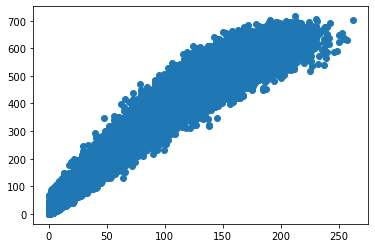

In [9]:
# Test Scatterplot 1
%matplotlib inline

plt.scatter(slugpct.H, slugpct.AB)

Text(0.5, 0, 'At Bats')

Text(0, 0.5, 'Hits')

Text(0.5, 1.0, 'AL Batters Batting Average, 2019')

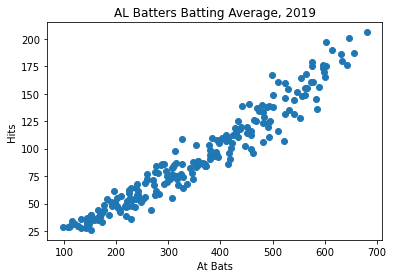

In [19]:
# Test scatterplot 2
plt.xlabel("At Bats")
plt.ylabel("Hits")
plt.title("AL Batters Batting Average, 2019")
plt.scatter(al_sluggers.AB, al_sluggers.H)
plt.show()

In [45]:
# slugpct.yearID
# 150 years total
yr = 1871 # First year statistics were recorded in baseball
slugpct

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108784,zimmebr02,2020,1,BAL,AL,2,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108785,zimmejo02,2020,1,DET,AL,3,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108786,zimmeky01,2020,1,KCA,AL,16,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108787,zuberty01,2020,1,KCA,AL,23,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# mean_rows = ['year', 'AB', 'H']
avg_ba = [None] * 150
# avg_ba
yr_ct = 0
add_ab = 0
add_h = 0
yr_counter = 0

# for a in slugarr:
    


# print(year_ba)

Text(0.5, 1.0, 'Batting Average')

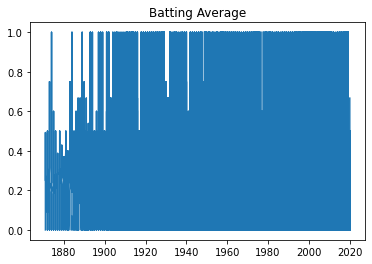

In [15]:
plt.plot(slugpct.yearID, slugpct.H/slugpct.AB)
plt.title("Batting Average")
plt.show()


<h1>Slugging</h1>

Slugging percentage is a batter's average of getting runners left on base home plate per at-bat. 




<h1>On-Base Percentage Plus Slugging (OPS)</h1>

On-Base Percentage Plus Slugging